In [15]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from datetime import datetime
# from statsmodels.tsa.arima.model import ARIMA
# from prophet import Prophet
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import GRU, Dense, Dropout
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from statsmodels.tsa.seasonal import seasonal_decompose
# import warnings
# warnings.filterwarnings('ignore')

# df = pd.read_csv("Eartquakes-1990-2023.csv")
# df['date'] = pd.to_datetime(df['date'], format='ISO8601', errors='coerce')
# df.set_index('date', inplace=True)
# data = df['magnitudo'].resample('M').mean().dropna()

# print(df.info())
# print(df.describe())
# print(df.head())
# print(df.columns)

# plt.figure(figsize=(12, 6))
# plt.plot(data, label="Time Series")
# plt.xlabel("Time")
# plt.ylabel("Values")
# plt.title("Time Series Data")
# plt.legend()
# plt.show()

# fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# plot_acf(data, ax=axes[0], lags=50)
# plot_pacf(data, ax=axes[1], lags=50)
# plt.show()

# result = seasonal_decompose(data, model='additive', period=12)
# result.plot()
# plt.show()

# scaler = MinMaxScaler()
# data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))

# X, y = [], []
# sequence_length = 30
# for i in range(len(data_scaled) - sequence_length):
#     X.append(data_scaled[i:i+sequence_length])
#     y.append(data_scaled[i+sequence_length])
# X, y = np.array(X), np.array(y)

# split = int(0.8 * len(X))
# X_train, X_test = X[:split], X[split:]
# y_train, y_test = y[:split], y[split:]

# gru_model = Sequential([
#     GRU(100, return_sequences=True, input_shape=(sequence_length, 1)),
#     Dropout(0.3),
#     GRU(100, return_sequences=False),
#     Dropout(0.3),
#     Dense(1)
# ])

# gru_model.compile(optimizer='adam', loss='mse')
# gru_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# gru_forecast = gru_model.predict(X_test[-30:])
# gru_forecast = scaler.inverse_transform(gru_forecast)

# # Predict on the test set
# gru_predictions = gru_model.predict(X_test)
# gru_predictions = scaler.inverse_transform(gru_predictions)
# y_test_actual = scaler.inverse_transform(y_test)

# # Calculate error metrics
# mae = mean_absolute_error(y_test_actual, gru_predictions)
# rmse = np.sqrt(mean_squared_error(y_test_actual, gru_predictions))
# mape = np.mean(np.abs((y_test_actual - gru_predictions) / y_test_actual)) * 100
# accuracy = 100 - mape  # Accuracy as (100 - MAPE)

# # Print results
# print(f"Mean Absolute Error (MAE): {mae:.4f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# print(f"Forecast Accuracy: {accuracy:.2f}%")

# scaler = MinMaxScaler()
# data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))

# X, y = [], []
# sequence_length = 30
# for i in range(len(data_scaled) - sequence_length):
#     X.append(data_scaled[i:i+sequence_length])
#     y.append(data_scaled[i+sequence_length])
# X, y = np.array(X), np.array(y)

# split = int(0.8 * len(X))
# X_train, X_test = X[:split], X[split:]
# y_train, y_test = y[:split], y[split:]

# lstm_model = Sequential([
#     LSTM(100, return_sequences=True, input_shape=(sequence_length, 1)),
#     Dropout(0.3),
#     LSTM(100, return_sequences=False),
#     Dropout(0.3),
#     Dense(1)
# ])

# lstm_model.compile(optimizer='adam', loss='mse')
# lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# lstm_forecast = lstm_model.predict(X_test[-30:])
# lstm_forecast = scaler.inverse_transform(lstm_forecast)

# y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
# y_test_predicted = scaler.inverse_transform(lstm_model.predict(X_test))

# mae = mean_absolute_error(y_test_actual, y_test_predicted)
# rmse = np.sqrt(mean_squared_error(y_test_actual, y_test_predicted))
# mape = np.mean(np.abs((y_test_actual - y_test_predicted) / y_test_actual)) * 100
# accuracy = 100 - mape

# print(f"LSTM Model Accuracy:")
# print(f"Mean Absolute Error (MAE): {mae:.4f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# print(f"Forecast Accuracy: {accuracy:.2f}%")

# arima_data = data.resample('M').mean().dropna()
# model_arima = ARIMA(arima_data, order=(5,1,0))
# model_arima_fit = model_arima.fit()
# arima_forecast = model_arima_fit.forecast(steps=30)
# arima_forecast = arima_forecast.to_numpy() 

# mae_arima = mean_absolute_error(y_test_actual[-30:], arima_forecast)
# rmse_arima = np.sqrt(mean_squared_error(y_test_actual[-30:], arima_forecast))
# mape_arima = np.mean(np.abs((y_test_actual[-30:] - arima_forecast) / y_test_actual[-30:])) * 100
# accuracy_arima = 100 - mape_arima

# print(f"ARIMA Model Accuracy:")
# print(f"Mean Absolute Error (MAE): {mae_arima:.4f}")
# print(f"Root Mean Squared Error (RMSE): {rmse_arima:.4f}")
# print(f"Mean Absolute Percentage Error (MAPE): {mape_arima:.2f}%")
# print(f"Forecast Accuracy: {accuracy_arima:.2f}%")

# prophet_df = arima_data.reset_index()
# prophet_df.columns = ['ds', 'y']
# prophet_df['ds'] = prophet_df['ds'].dt.tz_localize(None)

# prophet = Prophet()
# prophet.fit(prophet_df)

# future = prophet.make_future_dataframe(periods=30, freq='M')

# forecast = prophet.predict(future)

# prophet_forecast = forecast[['ds', 'yhat']].set_index('ds')
# prophet_predictions = prophet_forecast[-30:]['yhat'].values

# mae_prophet = mean_absolute_error(y_test_actual[-30:], prophet_predictions)
# rmse_prophet = np.sqrt(mean_squared_error(y_test_actual[-30:], prophet_predictions))
# mape_prophet = np.mean(np.abs((y_test_actual[-30:] - prophet_predictions) / y_test_actual[-30:])) * 100
# accuracy_prophet = 100 - mape_prophet

# print(f"Prophet Model Accuracy:")
# print(f"Mean Absolute Error (MAE): {mae_prophet:.4f}")
# print(f"Root Mean Squared Error (RMSE): {rmse_prophet:.4f}")
# print(f"Mean Absolute Percentage Error (MAPE): {mape_prophet:.2f}%")
# print(f"Forecast Accuracy: {accuracy_prophet:.2f}%")

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [17]:
data = pd.read_csv("Eartquakes-1990-2023.csv")
data['date'] = pd.to_datetime(data['date'], format='ISO8601', errors='coerce')
data.set_index('date', inplace=True)
# data = data[data["data_type"] == "earthquake"]

# data = df['magnitudo'].resample('M').mean().dropna()

In [18]:
data.describe

<bound method NDFrame.describe of                                            time  \
date                                              
1990-01-01 00:22:33.990000+00:00   631153353990   
1990-01-01 00:24:51.210000+00:00   631153491210   
1990-01-01 00:34:43.450000+00:00   631154083450   
1990-01-01 00:58:32.130000+00:00   631155512130   
1990-01-01 01:03:44.490000+00:00   631155824490   
...                                         ...   
2023-07-29 10:34:11.941000+00:00  1690626851941   
2023-07-29 10:36:15.715000+00:00  1690626975715   
2023-07-29 10:40:15.940000+00:00  1690627215940   
2023-07-29 10:55:46.040000+00:00  1690628146040   
2023-07-29 11:08:57.884000+00:00  1690628937884   

                                                                     place  \
date                                                                         
1990-01-01 00:22:33.990000+00:00         12 km NNW of Meadow Lakes, Alaska   
1990-01-01 00:24:51.210000+00:00                14 km S of Volcano, 

In [19]:
def drop_outliers(data, columns):
    for item in columns:
        q1 = data[item].quantile(0.10)
        q3 = data[item].quantile(0.90)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        upper_array = data.index[data[item] >= upper].tolist()
        lower_array = data.index[data[item] <= lower].tolist()

        data.drop(index=upper_array, inplace=True)
        data.drop(index=lower_array, inplace=True)

    return data

data = drop_outliers(data, data[["longitude", "latitude", "depth","magnitudo"]])

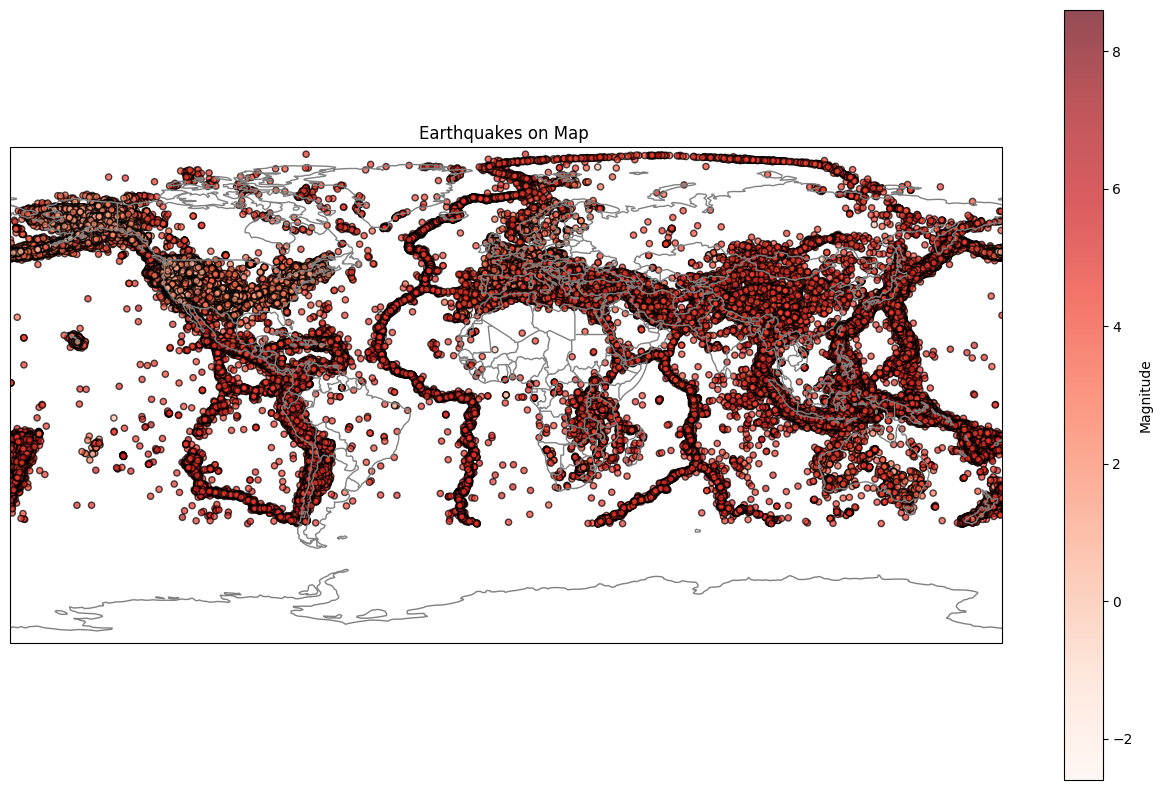

In [20]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def draw_earthquakes_on_map(df, mask=None, mask_title='', x='longitude', y='latitude', color_col='magnitudo', full_map=True):
    if mask is not None:
        df = df[mask]
    
    fig, ax = plt.subplots(figsize=(16, 10), subplot_kw={'projection': ccrs.PlateCarree()})
    
    if full_map:
        ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
    
    ax.add_feature(cfeature.COASTLINE, linestyle='-', linewidth=1, edgecolor='grey')
    ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1, edgecolor='grey')
    
    scatter = ax.scatter(df[x], df[y], c=df[color_col], cmap='Reds', alpha=0.7, s=20, edgecolors='k')
    
    plt.colorbar(scatter, ax=ax, label='Magnitude')
    
    plt.title(f'Earthquakes on Map {mask_title}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Call the function
draw_earthquakes_on_map(data)


In [21]:
print(data.describe)

<bound method NDFrame.describe of                                            time  \
date                                              
1990-01-01 00:22:33.990000+00:00   631153353990   
1990-01-01 00:24:51.210000+00:00   631153491210   
1990-01-01 00:34:43.450000+00:00   631154083450   
1990-01-01 00:58:32.130000+00:00   631155512130   
1990-01-01 01:03:44.490000+00:00   631155824490   
...                                         ...   
2023-07-29 10:33:35.980000+00:00  1690626815980   
2023-07-29 10:34:11.941000+00:00  1690626851941   
2023-07-29 10:36:15.715000+00:00  1690626975715   
2023-07-29 10:40:15.940000+00:00  1690627215940   
2023-07-29 10:55:46.040000+00:00  1690628146040   

                                                                     place  \
date                                                                         
1990-01-01 00:22:33.990000+00:00         12 km NNW of Meadow Lakes, Alaska   
1990-01-01 00:24:51.210000+00:00                14 km S of Volcano, 

In [22]:
print(df.info())
print(df.describe())
print(df.head())
print(df.columns)

NameError: name 'df' is not defined

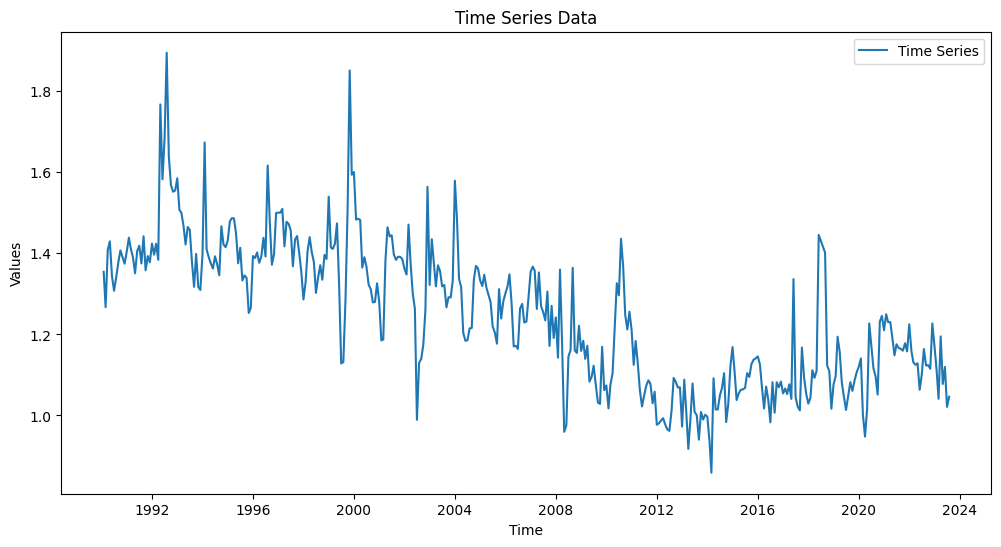

In [ ]:
data = data['magnitudo'].resample('M').mean().dropna()
plt.figure(figsize=(12, 6))
plt.plot(data, label="Time Series")
plt.xlabel("Time")
plt.ylabel("Values")
plt.title("Time Series Data")
plt.legend()
plt.show()

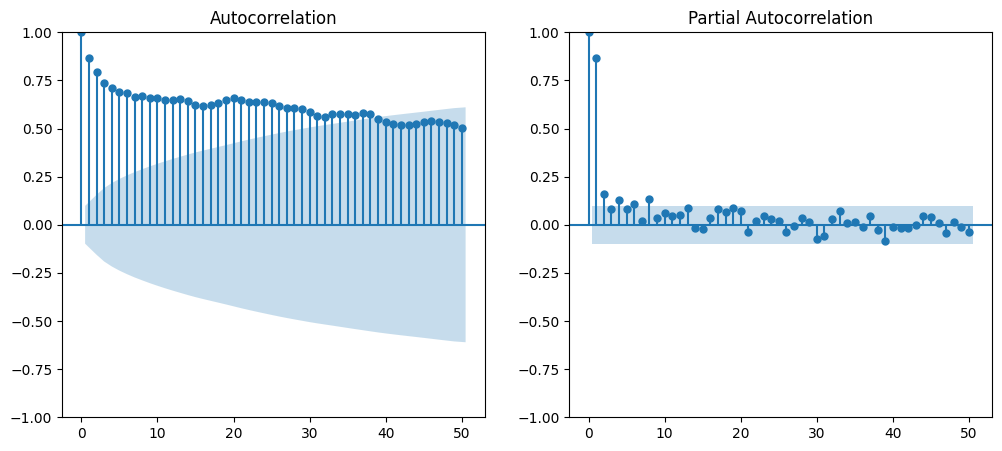

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(data, ax=axes[0], lags=50)
plot_pacf(data, ax=axes[1], lags=50)
plt.show()

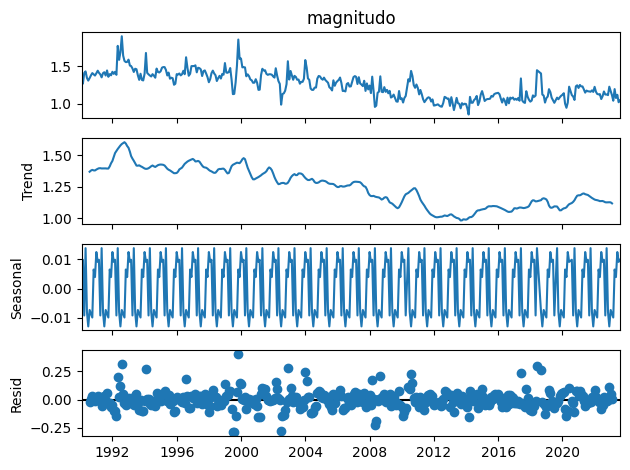

In [ ]:
result = seasonal_decompose(data, model='additive', period=12)
result.plot()
plt.show()

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))

X, y = [], []
sequence_length = 30
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i+sequence_length])
    y.append(data_scaled[i+sequence_length])
X, y = np.array(X), np.array(y)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

gru_model = Sequential([
    GRU(100, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.3),
    GRU(100, return_sequences=False),
    Dropout(0.3),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

gru_forecast = gru_model.predict(X_test[-30:])
gru_forecast = scaler.inverse_transform(gru_forecast)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0684 - val_loss: 0.0088
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0162 - val_loss: 0.0070
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0095 - val_loss: 0.0101
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0105 - val_loss: 0.0071
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0084 - val_loss: 0.0085
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0111 - val_loss: 0.0072
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0116 - val_loss: 0.0075
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0130 - val_loss: 0.0072
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0097 - val_loss: 0.0085
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0102 - val_loss: 0.0073
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0094 - val_loss: 0.0074
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

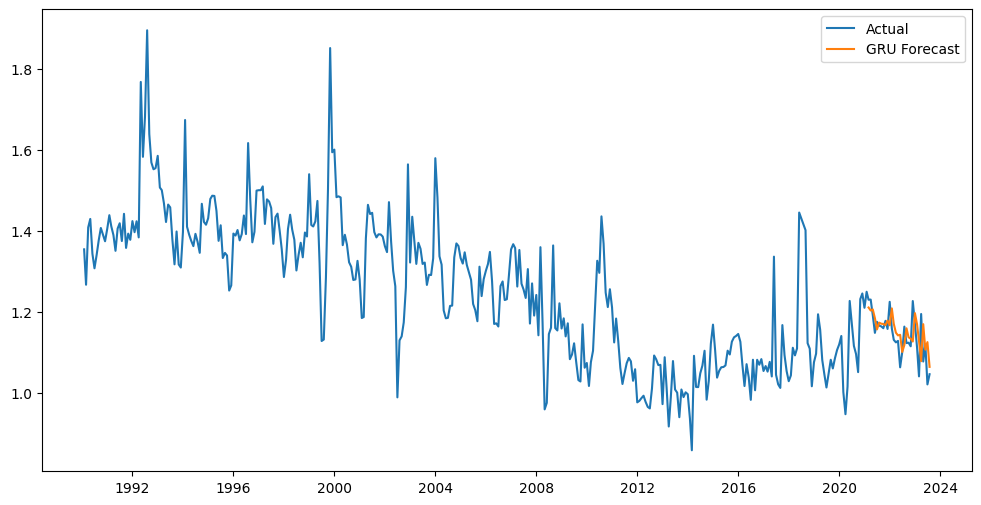

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data, label="Actual")
plt.plot(data.index[-30:], gru_forecast, label="GRU Forecast")
plt.legend()
plt.show()

In [ ]:
# Predict on the test set
gru_predictions = gru_model.predict(X_test)
gru_predictions = scaler.inverse_transform(gru_predictions)
y_test_actual = scaler.inverse_transform(y_test)

# Calculate error metrics
mae = mean_absolute_error(y_test_actual, gru_predictions)
rmse = np.sqrt(mean_squared_error(y_test_actual, gru_predictions))
mape = np.mean(np.abs((y_test_actual - gru_predictions) / y_test_actual)) * 100
accuracy = 100 - mape  # Accuracy as (100 - MAPE)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Forecast Accuracy: {accuracy:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 
Mean Absolute Error (MAE): 0.0565
Root Mean Squared Error (RMSE): 0.0844
Mean Absolute Percentage Error (MAPE): 4.92%
Forecast Accuracy: 95.08%


In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))

X, y = [], []
sequence_length = 30
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i+sequence_length])
    y.append(data_scaled[i+sequence_length])
X, y = np.array(X), np.array(y)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

lstm_model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.3),
    LSTM(100, return_sequences=False),
    Dropout(0.3),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

lstm_forecast = lstm_model.predict(X_test[-30:])
lstm_forecast = scaler.inverse_transform(lstm_forecast)

# Evaluate the model
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_predicted = scaler.inverse_transform(lstm_model.predict(X_test))

mae = mean_absolute_error(y_test_actual, y_test_predicted)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_test_predicted))
mape = np.mean(np.abs((y_test_actual - y_test_predicted) / y_test_actual)) * 100
accuracy = 100 - mape  # Accuracy as (100 - MAPE)

# Print results
print(f"LSTM Model Accuracy:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Forecast Accuracy: {accuracy:.2f}%")


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.1055 - val_loss: 0.0075
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0201 - val_loss: 0.0084
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0131 - val_loss: 0.0074
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0154 - val_loss: 0.0081
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0122 - val_loss: 0.0076
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0122 - val_loss: 0.0079
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0114 - val_loss: 0.0075
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0132 - val_loss: 0.0077
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0111 - val_loss: 0.0075
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0130 - val_loss: 0.0078
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0123 - val_loss: 0.0075
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

In [ ]:
arima_data = data.resample('M').mean().dropna()
model_arima = ARIMA(arima_data, order=(5,1,0))
model_arima_fit = model_arima.fit()
arima_forecast = model_arima_fit.forecast(steps=30)
arima_forecast = arima_forecast[-30:]
arima_forecast = arima_forecast.to_numpy() 

mae_arima = mean_absolute_error(y_test_actual[-30:], arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(y_test_actual[-30:], arima_forecast))
mape_arima = np.mean(np.abs((y_test_actual[-30:] - arima_forecast) / y_test_actual[-30:])) * 100
accuracy_arima = 100 - mape_arima

print(f"ARIMA Model Accuracy:")
print(f"Mean Absolute Error (MAE): {mae_arima:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_arima:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_arima:.2f}%")
print(f"Forecast Accuracy: {accuracy_arima:.2f}%")

ARIMA Model Accuracy:
Mean Absolute Error (MAE): 0.0842
Root Mean Squared Error (RMSE): 0.0962
Mean Absolute Percentage Error (MAPE): 7.21%
Forecast Accuracy: 92.79%


In [ ]:
prophet_df = arima_data.reset_index()
prophet_df.columns = ['ds', 'y']
prophet_df['ds'] = prophet_df['ds'].dt.tz_localize(None)

prophet = Prophet()
prophet.fit(prophet_df)

future = prophet.make_future_dataframe(periods=30, freq='M')

forecast = prophet.predict(future)

prophet_forecast = forecast[['ds', 'yhat']].set_index('ds')
prophet_predictions = prophet_forecast[-30:]['yhat'].values
prophet_predictions = prophet_predictions[-30:]

mae_prophet = mean_absolute_error(y_test_actual[-30:], prophet_predictions)
rmse_prophet = np.sqrt(mean_squared_error(y_test_actual[-30:], prophet_predictions))
mape_prophet = np.mean(np.abs((y_test_actual[-30:] - prophet_predictions) / y_test_actual[-30:])) * 100
accuracy_prophet = 100 - mape_prophet

print(f"Prophet Model Accuracy:")
print(f"Mean Absolute Error (MAE): {mae_prophet:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_prophet:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_prophet:.2f}%")
print(f"Forecast Accuracy: {accuracy_prophet:.2f}%")

00:10:53 - cmdstanpy - INFO - Chain [1] start processing
00:10:53 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model Accuracy:
Mean Absolute Error (MAE): 0.0522
Root Mean Squared Error (RMSE): 0.0678
Mean Absolute Percentage Error (MAPE): 4.24%
Forecast Accuracy: 95.76%


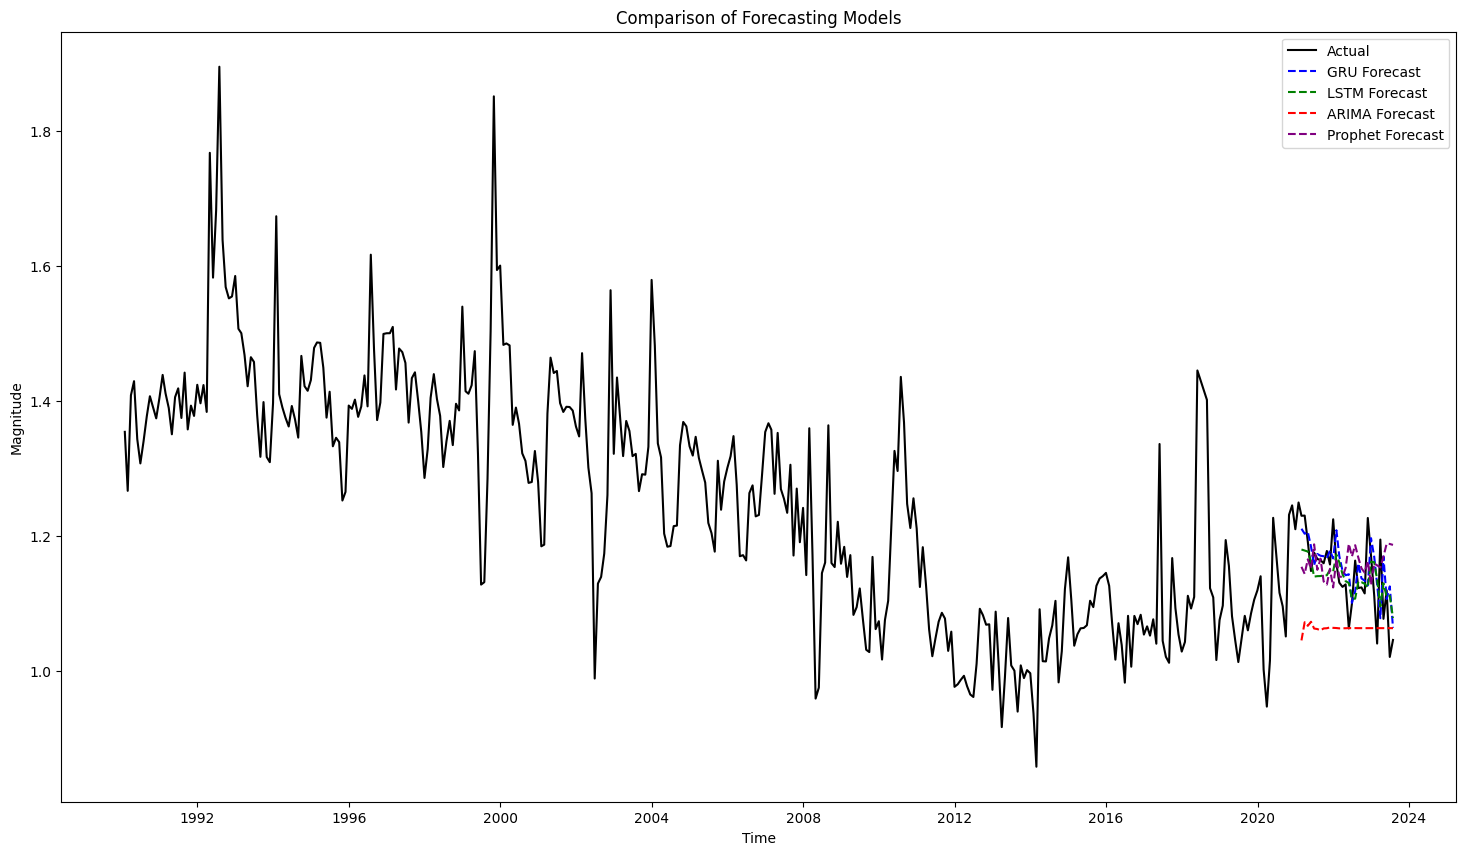

In [ ]:
plt.figure(figsize=(18, 10))
plt.plot(data.index, data, label="Actual", color='black')
plt.plot(data.index[-30:], gru_forecast, label="GRU Forecast", linestyle="dashed", color='blue')
plt.plot(data.index[-30:], lstm_forecast, label="LSTM Forecast", linestyle="dashed", color='green')
plt.plot(data.index[-30:], arima_forecast, label="ARIMA Forecast", linestyle="dashed", color='red')
plt.plot(data.index[-30:], prophet_predictions, label="Prophet Forecast", linestyle="dashed", color='purple')

plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("Comparison of Forecasting Models")
plt.legend()
plt.show()

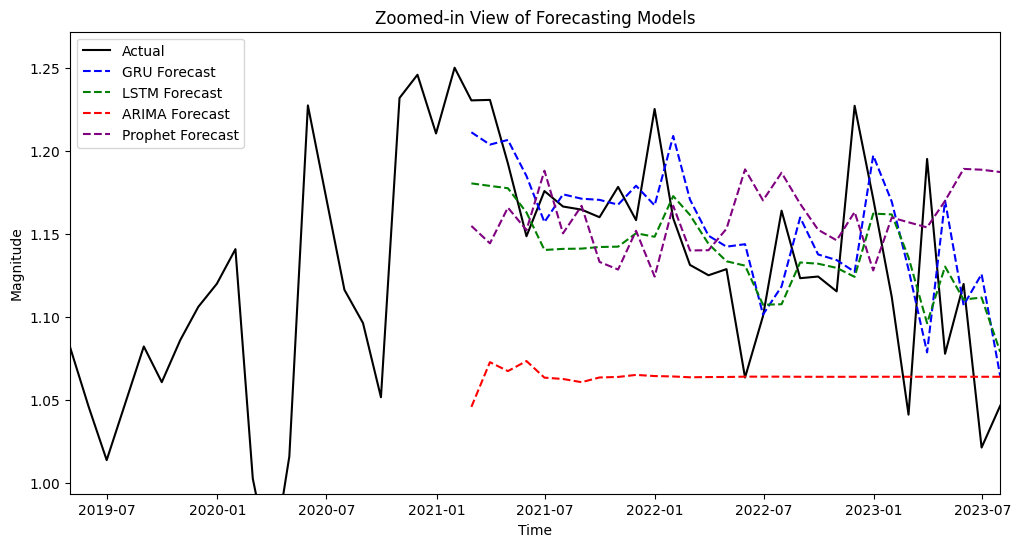

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data, label="Actual", color='black')
plt.plot(data.index[-30:], gru_forecast, label="GRU Forecast", linestyle="dashed", color='blue')
plt.plot(data.index[-30:], lstm_forecast, label="LSTM Forecast", linestyle="dashed", color='green')
plt.plot(data.index[-30:], arima_forecast, label="ARIMA Forecast", linestyle="dashed", color='red')
plt.plot(data.index[-30:], prophet_predictions, label="Prophet Forecast", linestyle="dashed", color='purple')

# Zoom in on the forecasted region
plt.xlim(data.index[-50], data.index[-1])  # Adjust to focus on recent data
plt.ylim(min(gru_forecast.min(), lstm_forecast.min(), arima_forecast.min(), prophet_predictions.min()) * 0.95, 
         max(gru_forecast.max(), lstm_forecast.max(), arima_forecast.max(), prophet_predictions.max()) * 1.05)

plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("Zoomed-in View of Forecasting Models")
plt.legend()
plt.show()

In [ ]:
%pip install cartopy

Note: you may need to restart the kernel to use updated packages.


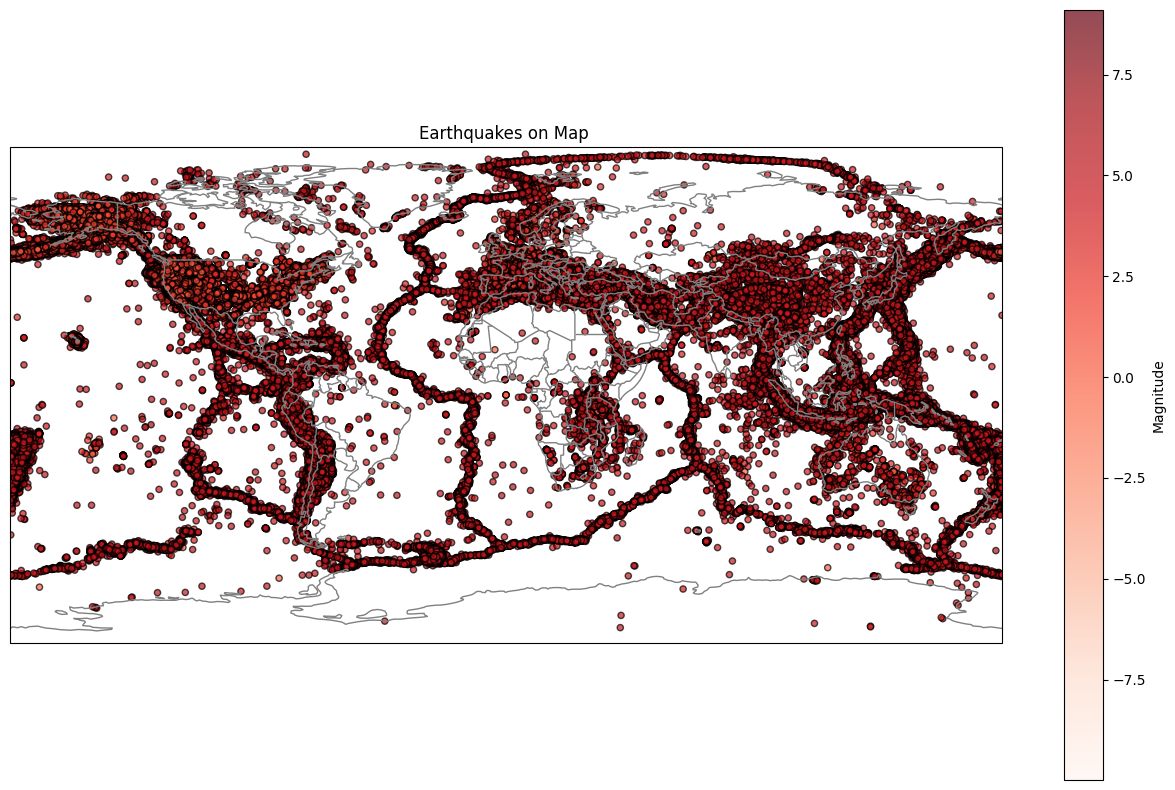

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def draw_earthquakes_on_map(df, mask=None, mask_title='', x='longitude', y='latitude', color_col='magnitudo', full_map=True):
    if mask is not None:
        df = df[mask]
    
    fig, ax = plt.subplots(figsize=(16, 10), subplot_kw={'projection': ccrs.PlateCarree()})
    
    if full_map:
        ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
    
    ax.add_feature(cfeature.COASTLINE, linestyle='-', linewidth=1, edgecolor='grey')
    ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1, edgecolor='grey')
    
    scatter = ax.scatter(df[x], df[y], c=df[color_col], cmap='Reds', alpha=0.7, s=20, edgecolors='k')
    
    plt.colorbar(scatter, ax=ax, label='Magnitude')
    
    plt.title(f'Earthquakes on Map {mask_title}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Call the function
draw_earthquakes_on_map(df)


In [26]:
%pip install PyWavelets

   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   ------------ --------------------------- 1.3/4.2 MB 8.4 MB/s eta 0:00:01
   --------------------------- ------------ 2.9/4.2 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------- 4.2/4.2 MB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import pywt
from statsmodels.tsa.arima.model import ARIMA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

data = pd.read_csv("Eartquakes-1990-2023.csv")
data['date'] = pd.to_datetime(data['date'], format='ISO8601', errors='coerce')
data.set_index('date', inplace=True)
data = data['magnitudo'].values.reshape(-1, 1)
# data = data['magnitudo'].resample('M').mean().dropna()
scaler = MinMaxScaler()
time_series_scaled = scaler.fit_transform(data)

# Apply Discrete Wavelet Transform (DWT)
coeffs = pywt.wavedec(time_series_scaled.flatten(), 'db4', level=3)
cA3, cD3, cD2, cD1 = coeffs  # Approximation & details

# Train ARIMA on low-frequency component
arima_model = ARIMA(cA3, order=(5,1,0))
arima_fit = arima_model.fit()
arima_pred = arima_fit.forecast(steps=len(cA3))

# Prepare LSTM dataset
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X_train, y_train = create_sequences(cD3, seq_length)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Build Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(50, return_sequences=True), input_shape=(seq_length, 1)),
    Bidirectional(LSTM(50)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train BiLSTM
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# Forecast using BiLSTM
X_test, _ = create_sequences(cD3, seq_length)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
bilstm_pred = model.predict(X_test)

# Hybrid Prediction: Weighted combination
alpha = 0.6  # Weight for BiLSTM
beta = 0.4   # Weight for ARIMA
final_pred = alpha * bilstm_pred.flatten() + beta * arima_pred[:len(bilstm_pred)]

# Evaluate the hybrid model
rmse = np.sqrt(mean_squared_error(y_train[:len(final_pred)], final_pred))
print(f'Hybrid Model RMSE: {rmse}')

Epoch 1/50


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26920/26920 ━━━━━━━━━━━━━━━━━━━━ 199s 7ms/step - loss: 0.0044
Epoch 2/50
26920/26920 ━━━━━━━━━━━━━━━━━━━━ 188s 7ms/step - loss: 0.0044
Epoch 3/50
26920/26920 ━━━━━━━━━━━━━━━━━━━━ 182s 7ms/step - loss: 0.0044
Epoch 4/50
26920/26920 ━━━━━━━━━━━━━━━━━━━━ 189s 7ms/step - loss: 0.0044
Epoch 5/50
26920/26920 ━━━━━━━━━━━━━━━━━━━━ 241s 9ms/step - loss: 0.0044
Epoch 6/50
26920/26920 ━━━━━━━━━━━━━━━━━━━━ 153s 6ms/step - loss: 0.0044
Epoch 7/50
26920/26920 ━━━━━━━━━━━━━━━━━━━━ 154s 6ms/step - loss: 0.0044
Epoch 8/50
26920/26920 ━━━━━━━━━━━━━━━━━━━━ 154s 6ms/step - loss: 0.0044
Epoch 9/50
19243/26920 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - loss: 0.0044

KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import pywt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"Eartquakes-1990-2023.csv")
df['date'] = pd.to_datetime(df['date'], format='ISO8601', errors='coerce')
df.set_index('date', inplace=True)

def wavelet_denoising(data, wavelet='db4', level=1):
    coeffs = pywt.wavedec(data, wavelet, level=level)
    coeffs[-1] = np.zeros_like(coeffs[-1])  # Remove noise from highest detail coefficients
    reconstructed = pywt.waverec(coeffs, wavelet)
    
    # Ensure length matches original input
    return reconstructed[:len(data)]


# Preprocess data
scaler = MinMaxScaler()
data = df[['magnitudo']]
data['magnitudo'] = scaler.fit_transform(data)
denoised = wavelet_denoising(data['magnitudo'])
data['magnitudo'] = denoised[:len(data)]
data = pd.Series(data['magnitudo'], index=df.index).dropna()

def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Split data
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]
X_train, y_train = create_sequences(train.values)
X_test, y_test = create_sequences(test.values)
X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

# Build BiLSTM model
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), callbacks=[reduce_lr], verbose=1)

# Make predictions
lstm_preds = model.predict(X_test)
lstm_preds = scaler.inverse_transform(lstm_preds)

def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

rmse, r2 = evaluate_model(test.values[:len(lstm_preds)], lstm_preds)
print(f"LSTM RMSE: {rmse:.4f}")
print(f"LSTM R² Score: {r2:.4f}")

# Auto-ARIMA Model
arima_model = auto_arima(train, seasonal=False, stepwise=True, suppress_warnings=True)
arima_preds = arima_model.predict(n_periods=len(test))
rmse_arima, r2_arima = evaluate_model(test.values, arima_preds)
print(f"ARIMA RMSE: {rmse_arima:.4f}")
print(f"ARIMA R² Score: {r2_arima:.4f}")

# Hybrid Model (Averaging LSTM & ARIMA)
hybrid_preds = (lstm_preds.flatten() + arima_preds[:len(lstm_preds)]) / 2
rmse_hybrid, r2_hybrid = evaluate_model(test.values[:len(hybrid_preds)], hybrid_preds)
print(f"Hybrid RMSE: {rmse_hybrid:.4f}")
print(f"Hybrid R² Score: {r2_hybrid:.4f}")

# Plot results
plt.figure(figsize=(12, 5))
plt.plot(test.index[:len(lstm_preds)], test.values[:len(lstm_preds)], label='Actual')
plt.plot(test.index[:len(lstm_preds)], lstm_preds, label='LSTM Predictions')
plt.plot(test.index[:len(lstm_preds)], arima_preds[:len(lstm_preds)], label='ARIMA Predictions', linestyle='dashed')
plt.plot(test.index[:len(hybrid_preds)], hybrid_preds, label='Hybrid Predictions', linestyle='dotted')
plt.legend()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_24708\567766570.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['magnitudo'] = scaler.fit_transform(data)
C:\Users\hp\AppData\Local\Temp\ipykernel_24708\567766570.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['magnitudo'] = denoised[:len(data)]


Epoch 1/20


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43072/43072 ━━━━━━━━━━━━━━━━━━━━ 449s 10ms/step - loss: 0.0012 - val_loss: 1.2319e-04 - learning_rate: 0.0010
Epoch 2/20
43072/43072 ━━━━━━━━━━━━━━━━━━━━ 444s 10ms/step - loss: 1.7010e-04 - val_loss: 1.2258e-04 - learning_rate: 0.0010
Epoch 3/20
43072/43072 ━━━━━━━━━━━━━━━━━━━━ 439s 10ms/step - loss: 1.5397e-04 - val_loss: 1.1400e-04 - learning_rate: 0.0010
Epoch 4/20
43072/43072 ━━━━━━━━━━━━━━━━━━━━ 405s 9ms/step - loss: 1.4739e-04 - val_loss: 1.1824e-04 - learning_rate: 0.0010
Epoch 5/20
43072/43072 ━━━━━━━━━━━━━━━━━━━━ 404s 9ms/step - loss: 1.4470e-04 - val_loss: 1.1554e-04 - learning_rate: 0.0010
Epoch 6/20
43072/43072 ━━━━━━━━━━━━━━━━━━━━ 405s 9ms/step - loss: 1.4264e-04 - val_loss: 1.1683e-04 - learning_rate: 0.0010
Epoch 7/20
43072/43072 ━━━━━━━━━━━━━━━━━━━━ 406s 9ms/step - loss: 1.3709e-04 - val_loss: 1.2014e-04 - learning_rate: 5.0000e-04
Epoch 8/20
43072/43072 ━━━━━━━━━━━━━━━━━━━━ 419s 10ms/step - loss: 1.3683e-04 - val_loss: 1.2697e-04 - learning_rate: 5.0000e-04
Epoch 9/20


KeyboardInterrupt: 

: 